In [1]:
import sys
from pprint import pprint

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 9)
plt.rcParams['font.size'] = 16
import numpy as np
import pandas as pd
# import seaborn as sns
# sns.set_style('whitegrid')

# PALETTE = sns.color_palette()

In [2]:
def reformat(raw_data):
    lines = []
    dates = [np.datetime64('20{2}-{0:02d}-{1:02d}'.format(*map(int, d.split('/')))) for d in raw_data.columns[4:]]
    for i, record in raw_data.iterrows():
        for i, d in enumerate(record[4:]):
            location = record['Country/Region'].strip()
            if isinstance(record['Province/State'], str):
                location += ' - ' + record['Province/State'].strip()
            if d > 0:
                lines.append({
                    'location': location,
                    'country': record['Country/Region'],
                    'deaths': d,
                    'date': dates[i]
                })

    return pd.DataFrame(lines).set_index('date')

def combine_countries(data):
    """don't separate data for different regions"""
    lines = []
    for key, grp in data.groupby(['country', 'date']):
        total_deaths = np.sum(grp['deaths'])
        lines.append({
            'location': grp['country'][0],
            'country': grp['country'][0],
            'deaths': total_deaths,
            'date': grp.index[0]
        })
    return pd.DataFrame(lines).set_index('date')

base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master'
source_url = base_url + '/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
print(source_url)
raw_data = pd.read_csv(source_url)
data = reformat(raw_data)
data = combine_countries(data)
pprint(data)

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
               location      country  deaths
date                                        
2020-03-22  Afghanistan  Afghanistan       1
2020-03-23  Afghanistan  Afghanistan       1
2020-03-24  Afghanistan  Afghanistan       1
2020-03-25  Afghanistan  Afghanistan       2
2020-03-26  Afghanistan  Afghanistan       4
...                 ...          ...     ...
2020-03-24     Zimbabwe     Zimbabwe       1
2020-03-25     Zimbabwe     Zimbabwe       1
2020-03-26     Zimbabwe     Zimbabwe       1
2020-03-27     Zimbabwe     Zimbabwe       1
2020-03-28     Zimbabwe     Zimbabwe       1

[1589 rows x 3 columns]


In [3]:

def reformat(raw_data):
    lines = []
    for i, record in raw_data.iterrows():
        for i, d in enumerate(record[4:]):
            location = record['state'].strip()
            if record['death'] > 0:
                lines.append({
                    'location': location,
                    'country': location,
                    'deaths': record['death'],
                    'date': record['date']
                })

    return pd.DataFrame(lines[::-1]).set_index('date')

source_url = 'http://covidtracking.com/api/states/daily.csv'
print(source_url)
from datetime import datetime
mydateparser = lambda x: datetime.strptime(x, "%Y%m%d")
raw_data = pd.read_csv(source_url, parse_dates=['date'], date_parser=mydateparser)
state_data = reformat(raw_data)
pprint(state_data)
# print(state_data.index[0])


http://covidtracking.com/api/states/daily.csv
           location country  deaths
date                               
2020-03-11       WA      WA    24.0
2020-03-11       WA      WA    24.0
2020-03-11       WA      WA    24.0
2020-03-11       WA      WA    24.0
2020-03-11       WA      WA    24.0
...             ...     ...     ...
2020-03-28       AK      AK     2.0
2020-03-28       AK      AK     2.0
2020-03-28       AK      AK     2.0
2020-03-28       AK      AK     2.0
2020-03-28       AK      AK     2.0

[5889 rows x 3 columns]


In [4]:
# pprint(data.tail(3))
print(data['location'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belgium'
 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Cabo Verde' 'Cameroon' 'Canada' 'Chile' 'China' 'Colombia'
 'Congo (Kinshasa)' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Denmark' 'Diamond Princess' 'Dominican Republic' 'Ecuador' 'Egypt'
 'Estonia' 'Finland' 'France' 'Gabon' 'Gambia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guyana' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Korea, South' 'Kosovo' 'Lebanon' 'Lithuania'
 'Luxembourg' 'Malaysia' 'Mauritius' 'Mexico' 'Moldova' 'Montenegro'
 'Morocco' 'Netherlands' 'Nicaragua' 'Niger' 'Nigeria' 'North Macedonia'
 'Norway' 'Pakistan' 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Qatar' 'Romania' 'Russia' 'San Marino' 'Saudi Arabia'
 'Serbia' 'Singapore' 'Slovakia

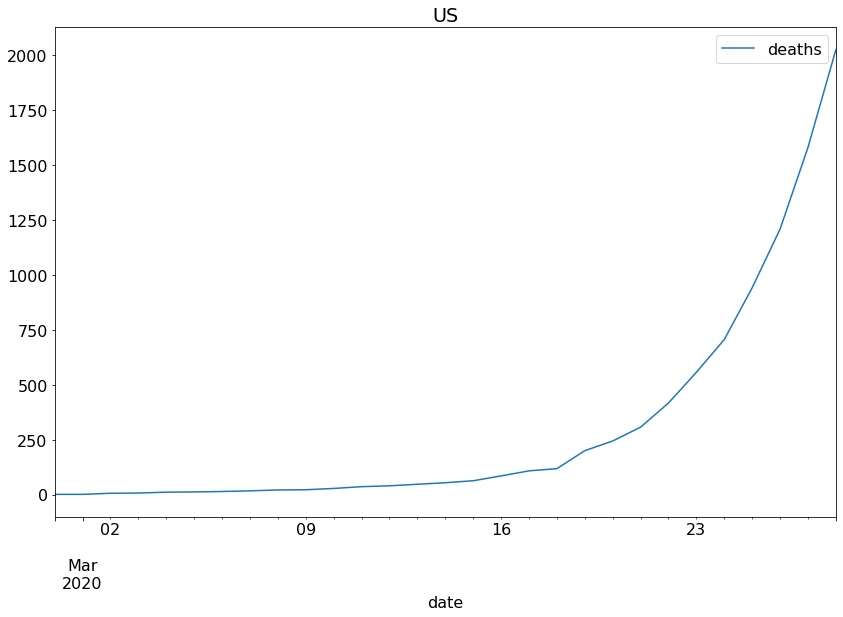

In [5]:
# pprint(data['location'].unique())
df_filtered = data[data['location'] == 'US']
ax = df_filtered.plot(title='US')
# ax.title('US')

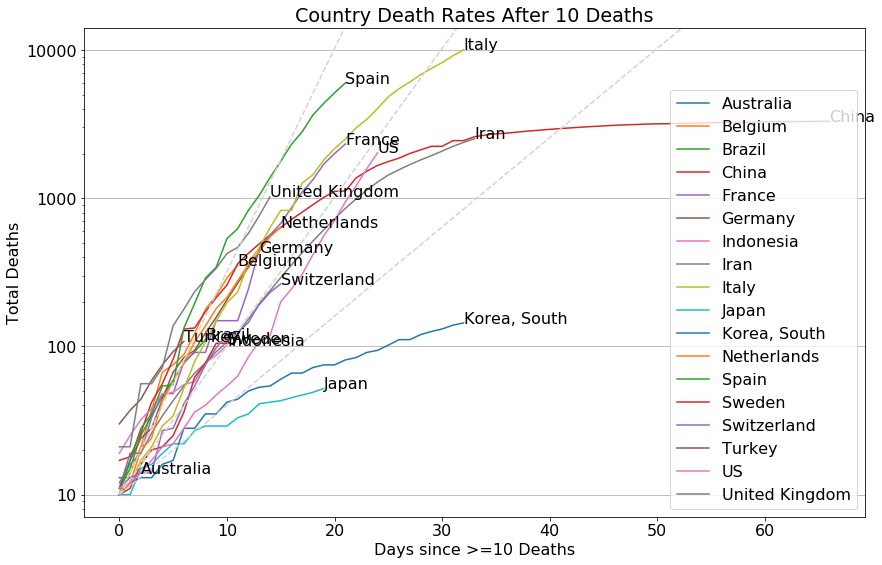

In [13]:
locations_of_interest = data[data['deaths'] > 100]['location'].unique()
# explicitly add other places
locations_of_interest = list(locations_of_interest)
locations_of_interest.extend(['Australia', 'Japan'])
# print(locations_of_interest)
df_10 = data[data['deaths'] >= 10]
# df_10 = df_filtered[df_filtered['deaths'] >= 10]

fig, ax = plt.subplots()
# ax = df_10.groupby('location').plot(title='Country Death Rates')
legends = []
for key, grp in df_10.groupby('location'):
    if key not in locations_of_interest:
        continue
    grp = grp.copy()
    grp['days'] = (grp.index - grp.index[0]).days
    legends.append(key)
    myax = grp.plot(ax=ax, kind='line', x='days')
    plt.text(grp['days'][-1], grp['deaths'][-1], key)
plt.legend(loc='best')
# plt.show()
ax.legend(legends)
plt.title('Country Death Rates After 10 Deaths')
plt.xlabel('Days since >=10 Deaths')
plt.ylabel('Total Deaths')


plt.yscale('log')
plt.grid(axis='y')
from matplotlib.ticker import ScalarFormatter
ax.yaxis.set_major_formatter(ScalarFormatter())
limits = plt.axis()
# plot double 2, 3, 5 days
import math
double_days = [2, 3, 5]
for days in double_days:
    double_rate = 10**(math.log10(2)/days)
    x = np.arange(0,limits[1]-limits[0]+1)
    y = 10*double_rate**x
    ax.plot(x,y,'--', color='lightgrey')
# limits = list(limits)
# limits[1] = 40
ax = plt.axis(limits)



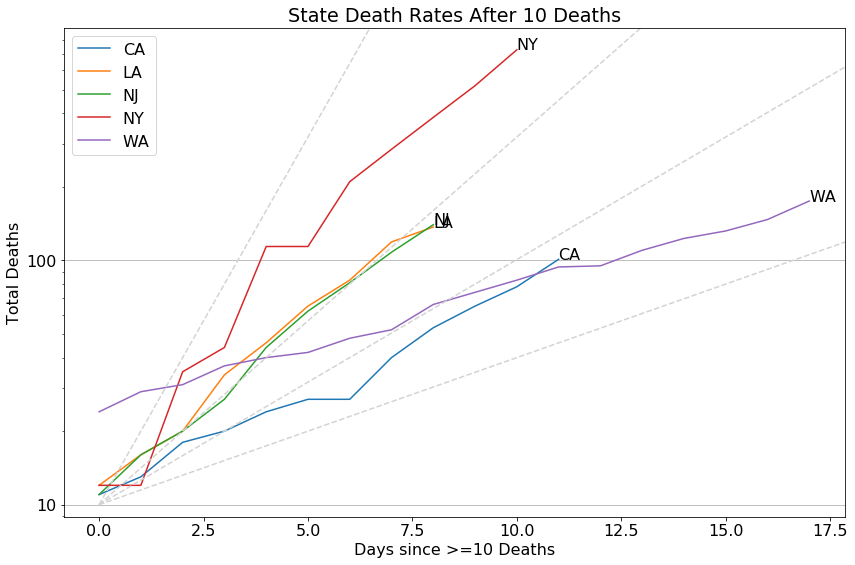

In [12]:
locations_of_interest = state_data[state_data['deaths'] > 100]['location'].unique()
# print(locations_of_interest)
df_10 = state_data[state_data['deaths'] >= 10]
# df_10 = df_filtered[df_filtered['deaths'] >= 10]

fig, ax = plt.subplots()
# ax = df_10.groupby('location').plot(title='Country Death Rates')
legends = []
for key, grp in df_10.groupby('location'):
    if key not in locations_of_interest:
        continue
    grp = grp.copy()
    grp['days'] = (grp.index - grp.index[0]).days
    legends.append(key)
    myax = grp.plot(ax=ax, kind='line', x='days')
    plt.text(grp['days'][-1], grp['deaths'][-1], key)
plt.legend(loc='best')
# plt.show()
ax.legend(legends)
plt.title('State Death Rates After 10 Deaths')
plt.xlabel('Days since >=10 Deaths')
plt.ylabel('Total Deaths')


plt.yscale('log')
plt.grid(axis='y')
from matplotlib.ticker import ScalarFormatter
ax.yaxis.set_major_formatter(ScalarFormatter())
limits = plt.axis()
# plot double 2, 3, 5 days
import math
double_days = [1, 2, 3, 5]
for days in double_days:
    double_rate = 10**(math.log10(2)/days)
    x = np.arange(0,limits[1]-limits[0]+1)
    y = 10*double_rate**x
    ax.plot(x,y,'--', color='lightgrey')
# limits = list(limits)
# limits[1] = 40
ax = plt.axis(limits)

